# Image Classification using CNNs
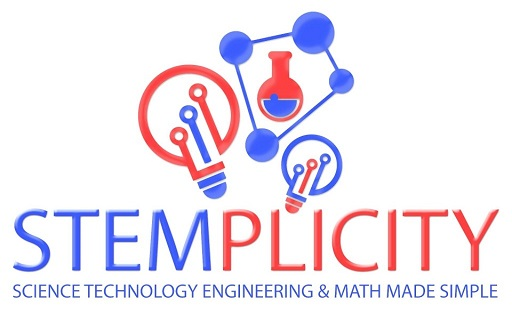

You need to classify images based on previous knowledge adquired from the CIFAR-10 dataset.

In this challenge we have a CIFAR-10 dataset consisting in 60000 low resolution images divided into the following 10 classes: 

- Airplanes
- Cars 
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

#### **Main Objective**: The main objective is to build a image classifier


## Table of Contents

1. [Import Libraries](#1)
2. [Import Data](#2)
    - 2.1. [Data Visualization](#2.1)
3. [Data Preparation](#3)
    - 3.1. [One Hot Encoding Target Variable](#3.1)
    - 3.2. [Data Normalization](#3.2)
    - 3.3. [Age Column](#3.3)
    - 3.4. [Country Column](#3.4)
4. [One Hot Encoding](#4)
5. [Feature Selection](#5)
6. [Train Test Split](#6)
7. [Data Normalization](#7)
8. [Model Training](#8)
9. [Model Evaluation](#9)

# STEP #1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
from tensorflow import keras

from keras import layers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# STEP #2: IMPORT DATA

In [2]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

## STEP #2.1: Data Visualization

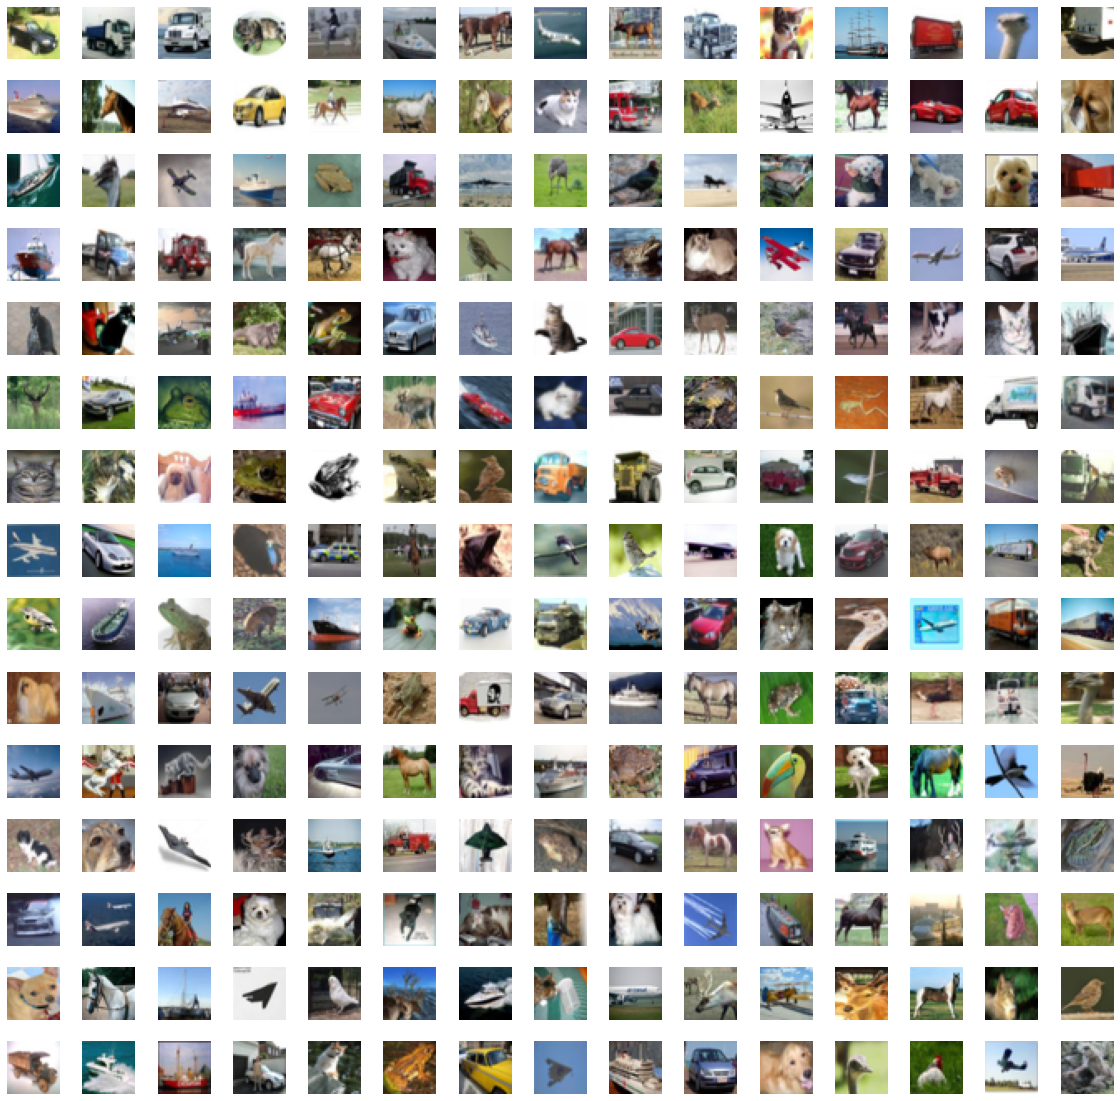

In [3]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20, 20))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# STEP #3: DATA PREPARATION
## STEP #3.1: ONE HOT ENCODING THE TARGET VARIABLE

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean=np.mean(X_train)
std=np.std(X_train)
X_test=(X_test-mean)/std
X_train=(X_train-mean)/std

In [5]:
number_categories = 10
y_train = keras.utils.to_categorical(y_train, number_categories)
y_test = keras.utils.to_categorical(y_test, number_categories)

## STEP #3.1: DATA NORMALIZATION

# STEP #4: IMAGE AUGMENTATION

In [7]:
#to get the correct input shape to feed the model
Input_shape = X_train.shape[1:]

In [8]:
with tf.device('/cpu:0'):
   data_augmentation = tf.keras.Sequential([
     tf.keras.layers.RandomFlip('horizontal',input_shape=Input_shape),
     tf.keras.layers.RandomRotation(0.05),
     ])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-26 15:39:27.549397: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-26 15:39:27.549542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# STEP #4: TRAIN THE MODEL

In [9]:
model = Sequential([
    data_augmentation,
    Conv2D(32, kernel_size = (3,3), activation = 'relu', padding='same'),
    BatchNormalization(axis=-1),
    Conv2D(32, kernel_size = (3,3), activation = 'relu',padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(64, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    Conv2D(64, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    MaxPooling2D(2,2),

    Conv2D(128, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    Conv2D(128, kernel_size = (3,3), activation = 'relu',padding='same'),
    BatchNormalization(axis=-1),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation = 'softmax'),
])

In [10]:
opt = keras.optimizers.Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 30, shuffle = True,callbacks=[callback], validation_split=0.1)

Epoch 1/30


2022-10-26 15:39:36.305664: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-26 15:39:36.866581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - ETA: 0s - loss: 1.6386 - accuracy: 0.4587

2022-10-26 15:42:47.529004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - 192s 542ms/step - loss: 1.6386 - accuracy: 0.4587 - val_loss: 1.2210 - val_accuracy: 0.5724
Epoch 2/30
352/352 [==============================] - 192s 546ms/step - loss: 1.0716 - accuracy: 0.6210 - val_loss: 0.9729 - val_accuracy: 0.6700
Epoch 3/30
352/352 [==============================] - 185s 526ms/step - loss: 0.8744 - accuracy: 0.6926 - val_loss: 0.7649 - val_accuracy: 0.7398
Epoch 4/30
352/352 [==============================] - 186s 528ms/step - loss: 0.7663 - accuracy: 0.7325 - val_loss: 0.6831 - val_accuracy: 0.7606
Epoch 5/30
352/352 [==============================] - 186s 528ms/step - loss: 0.6881 - accuracy: 0.7589 - val_loss: 0.7499 - val_accuracy: 0.7460
Epoch 6/30
352/352 [==============================] - 185s 526ms/step - loss: 0.6300 - accuracy: 0.7820 - val_loss: 0.6308 - val_accuracy: 0.7894
Epoch 7/30
352/352 [==============================] - 186s 528ms/step - loss: 0.5855 - accuracy: 0.7975 - val_loss: 0.6308 - val_accura

# STEP #5: EVALUATE THE MODEL

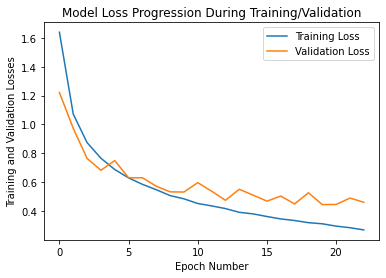

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [12]:
evaluation = model.evaluate(X_test, y_test,batch_size=128)
print('Test Accuracy: {}'.format(evaluation[1]))

79/79 [==============================] - 1s 13ms/step - loss: 0.4847 - accuracy: 0.8526
Test Accuracy: 0.8526000380516052


In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

test_pred = model.predict(X_test)

 18/313 [>.............................] - ETA: 1s

2022-10-26 16:58:13.900768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


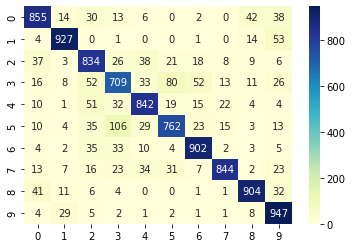

In [14]:
import numpy as np

ax = sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(test_pred, axis=1)), cmap="YlGnBu",annot=True,fmt="d")

# STEP #6: SAVING THE MODEL

In [17]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_model.h5')
model.save(model_path)